In [5]:
import torch
import optuna
import pandas as pd 
import numpy as np


In [40]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self,input_length):
        super().__init__()
        self.input_length = input_length
        self.fc1 = torch.nn.Linear(self.input_length,30)
        self.ac1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(30,30)
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(30,20)
        self.ac3 = torch.nn.ReLU()
        self.out = torch.nn.Linear(20,1)
    def forward(self,x):
        out = self.ac1(self.fc1(x))
        out = self.ac2(self.fc2(out))
        out = self.ac3(self.fc3(out))
        return self.out(out)

# Pick five pressure from each 

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


def pred_dataset(file_names):
    source_path = 'C:/Kai_Zhang/MachineLearning/Unified gas Adsorption/CO2_adsorption/new_data'
    pressure = []
    for file_name in file_names:
        temp_data = pd.read_excel(os.path.join(source_path,file_name+'-01-10-2022.xlsx'),skiprows=1)
        #print(temp_data.head())
        indexes = sorted(list(set(temp_data['Index'].values)))
        #print(indexes)
        for index in indexes:
            temp_iso = temp_data[temp_data['Index']==index]
            temp_pres = []
            if len(temp_iso)>=5:
                pressures = list(temp_iso['Pressure'].values)
                temp_pres.append(pressures[0])
                temp_pres.append(pressures[-1])
                temp_pres.extend(np.random.choice(pressures[1:-1],3,replace=False))
                pressure.append(sorted(temp_pres)) 
    return pressure


In [8]:
from sklearn.utils import shuffle
pressure = pred_dataset(['CO2','Methane',"Ethane&Ethylene",'CFCs','Hydrogen'])
pd.DataFrame(pressure).to_csv('./Pressure.csv')

# Test simple method

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#index_total = ["S",'V','L',"BET",'Vt','Temp(K)','P1','P2','P3','P4','P5',"K","n",'Vmic']
index_total = ["S",'V','L',"BET",'Vt','Temp(K)',"K","n",'Vmic',]
def pred_dataset(file_names):
    source_path = 'C:/Kai_Zhang/MachineLearning/Unified gas Adsorption/CO2_adsorption/new_data'
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    for file_name in file_names:
        temp_data = pd.read_csv(os.path.join(source_path,file_name+'-fitting-02-01-2022.csv'))
        
        temp_data = temp_data.dropna(axis=0,how = 'any',subset = ["BET","Vt"])
        #temp_data = temp_data[temp_data['R2']>0.95]
        #temp_data = temp_data[temp_data['Vmic']<2]
        temp_data = temp_data[index_total]
        train_x,test_x = train_test_split(temp_data,test_size = 0.1)
        
        train_df = pd.concat([train_df,train_x],axis=0)
        test_df = pd.concat([test_df,test_x],axis =0)
    return train_df,test_df

In [72]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#index_total = ["S",'V','L',"BET",'Vt','Temp(K)','P1','P2','P3','P4','P5',"K","n",'Vmic']
index_total = ["S",'V','L',"BET",'Index','Vt','Temp(K)',"K","n",'Vmic',]
def pred_dataset(file_names):
    source_path = 'C:/Kai_Zhang/MachineLearning/Unified gas Adsorption/CO2_adsorption/new_data'
    data_df = pd.DataFrame()
    
    for file_name in file_names:
        temp_data = pd.read_csv(os.path.join(source_path,file_name+'-fitting-02-01-2022.csv'))
        
        temp_data = temp_data.dropna(axis=0,how = 'any',subset = ["BET","Vt",'Vmic'])
        #temp_data = temp_data[temp_data['R2']>0.95]
        #temp_data = temp_data[temp_data['Vmic']<2]
        temp_data = temp_data[index_total]
        data_df = pd.concat([data_df,temp_data],axis=0)   
    return data_df

In [73]:
data_set = pred_dataset(['CO2','Methane','Ethane&Ethylene','CFCs'])
data_set

,S,V,L,BET,Index,Vt,Temp(K),K,n,Vmic
0,0.28,0.2809,0.058,1239.0,0,0.43,298.0,3.718193,0.580048,NaN
1,0.28,0.2809,0.058,1500.0,1,0.52,298.0,4.239549,0.645567,NaN
2,0.28,0.2809,0.058,1636.0,2,0.54,298.0,3.923048,0.686518,NaN
3,0.28,0.2809,0.058,1239.0,3,0.43,273.0,5.778978,0.483666,NaN
4,0.28,0.2809,0.058,1500.0,4,0.52,273.0,6.330842,0.575817,NaN
...,...,...,...,...,...,...,...,...,...,...
122,0.49,0.2849,0.040,2200.0,2318,1.00,347.3,8.385590,0.704511,NaN
123,0.49,0.2849,0.040,3200.0,2319,1.70,317.7,17.408341,0.724386,NaN
124,0.49,0.2849,0.040,3200.0,2320,1.70,327.3,15.579179,0.755499,NaN
125,0.49,0.2849,0.040,3200.0,2321,1.70,337.4,12.746224,0.788900,NaN


In [81]:
train_data = data_set.dropna(axis=0,how = 'any',subset = ["Vmic"])
train_data

,S,V,L,BET,Index,Vt,Temp(K),K,n,Vmic
31,0.28,0.2809,0.058,1479.0,31,0.7100,298.0,3.474703,0.687310,0.6300
32,0.28,0.2809,0.058,2264.0,32,1.0200,298.0,3.179363,0.763878,0.9200
33,0.28,0.2809,0.058,1778.0,33,1.0200,298.0,1.959096,0.786037,0.6700
38,0.28,0.2809,0.058,1470.0,38,0.6415,298.0,4.401633,0.442913,0.6304
39,0.28,0.2809,0.058,1470.0,39,0.6415,308.0,3.513874,0.469464,0.6304
...,...,...,...,...,...,...,...,...,...,...
105,0.49,0.2849,0.040,888.9,2301,0.4400,323.0,1.314853,0.641322,0.4000
106,0.49,0.2849,0.040,888.9,2302,0.4400,343.0,0.869026,0.688773,0.4000
107,0.49,0.2849,0.040,743.1,2303,0.3700,303.0,1.795771,0.548770,0.3300
108,0.49,0.2849,0.040,743.1,2304,0.3700,323.0,1.085768,0.641423,0.3300


In [80]:
target = data_set[~data_set['Index'].isin(list(train_data["Index"].values))]
target.drop(columns = "Index").to_csv('./Vmic_target.csv')

In [56]:
from sklearn.utils import shuffle
train_df,test_df = pred_dataset(['CO2','Methane','Ethane&Ethylene','CFCs'])
train_df = shuffle(train_df)
test_df = shuffle(test_df)

In [82]:
train_data = shuffle(train_data)
train_df,test_df = train_test_split(train_data,test_size=0.1)

In [83]:
# with pressure
train_x= train_df.iloc[:,:-1]
test_x = test_df.iloc[:,:-1] 
train_y = train_df.iloc[:,-1].values
test_y = test_df.iloc[:,-1].values

In [132]:
test_df.to_csv('./test_df_vmic_pred.csv')

# cross validation + grid search



In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,\
    BaggingRegressor,ExtraTreesRegressor,RandomForestRegressor
from lightgbm import LGBMRegressor  
  
n_estimators = [50,100,120,150,180,200,300,400]

# define different models#('SVR',SVR(max_iter=10000)),
models = [
    ('DT',DecisionTreeRegressor(random_state=42)),\
     #('ADBR',AdaBoostRegressor(random_state=42)), 
    ("GBR",GradientBoostingRegressor(random_state=42)),\
    ('BG',BaggingRegressor(random_state=42,n_jobs=-1)),
    ('ETR',ExtraTreesRegressor(random_state=42,n_jobs=-1)),\
    ('RF',RandomForestRegressor(n_jobs=-1,random_state=42)),
    ('LGBM',LGBMRegressor(n_jobs = -1,random_state = 42)),\
    ('BGLGBM',BaggingRegressor(LGBMRegressor(n_estimators = 200, n_jobs = -1,random_state = 42), random_state=42,n_jobs=-1))
    ]

# set search parameters grid for different models
para_grids = { #'SVR':{'kernel':['linear','poly','rbf','sigmoid','precomputed']},\
    'DT':{'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},\
    'ADBR':{'n_estimators':n_estimators,'learning_rate':[0.1,0.5,1,2],'loss':['linear','square','exponential']},\
    'GBR':{'n_estimators':n_estimators,'learning_rate':[0.1,0.5,1,2]},\
    'BG':{'n_estimators':[10,50,100]},\
    'ETR':{'n_estimators':n_estimators},\
    'RF':{'n_estimators':n_estimators},\
    'LGBM':{'num_leaves':[10,20,30,50],'learning_rate': [0.05,0.1,0.5,1],
    'n_estimators':n_estimators},\
    'BGLGBM':{'n_estimators':[10,30,50]}
    }

In [86]:
from sklearn.model_selection import GridSearchCV,cross_validate


for model_name,model in models:
    result = GridSearchCV(model,para_grids[model_name],cv= 10,return_train_score=True,n_jobs=-1)
    result.fit(train_x,train_y)
    model_refit =model.set_params(**result.best_params_)
    train_cv = cross_validate(model_refit,train_x,train_y,cv = 10,scoring = ('r2', 'neg_mean_squared_error'))
    train_mse_cv = -train_cv['test_neg_mean_squared_error'].mean()
    model_refit.fit(train_x,train_y)
    train_r2_cv = train_cv['test_r2'].mean()
    test_pre = model_refit.predict(test_x)
    test_r2 = r2_score(test_pre,test_y) 
    test_mse = mean_squared_error(test_y,test_pre)
    print('Algorithm {}, Train_r2_cv {}, Train_mse_cv {}, Test_r2 {}, Test_error {}, best_params {}'.format(model_name,train_r2_cv,train_mse_cv,test_r2,test_mse,result.best_params_))

Algorithm DT, Train_r2_cv 0.7375815957235161, Train_mse_cv 0.024349626710782998, Test_r2 0.8065975236252066, Test_error 0.02113674089746428, best_params {'criterion': 'friedman_mse'}
Algorithm GBR, Train_r2_cv 0.876452280762581, Train_mse_cv 0.011385113564087817, Test_r2 0.9299176929141719, Test_error 0.006889948191853902, best_params {'learning_rate': 0.5, 'n_estimators': 400}
Algorithm BG, Train_r2_cv 0.845404581126713, Train_mse_cv 0.014199264361303796, Test_r2 0.8490476829408965, Test_error 0.012052745356194, best_params {'n_estimators': 100}
Algorithm ETR, Train_r2_cv 0.8655722747910669, Train_mse_cv 0.012474101363170296, Test_r2 0.8769613319223581, Test_error 0.010275991252728787, best_params {'n_estimators': 200}
Algorithm RF, Train_r2_cv 0.846496116283762, Train_mse_cv 0.014094879399369462, Test_r2 0.8597856097919659, Test_error 0.011301339675782344, best_params {'n_estimators': 300}
Algorithm LGBM, Train_r2_cv 0.879402770742644, Train_mse_cv 0.010865575724396673, Test_r2 0.894

In [11]:
result.best_params_ 

{'n_estimators': 500}

Algorithm ETR, Train_error 0.00015293859449554272, Test_error 0.006889948191853902


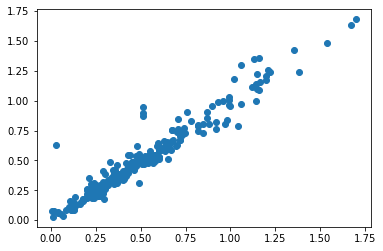

In [92]:
model = GradientBoostingRegressor(n_estimators = 400,random_state=42,learning_rate=0.5)
#model = LGBMRegressor(n_estimators =400, learning_rate = 0.1, num_leaves =20,random_state=42)
cross_validate(model,train_x,train_y,cv =10)
model.fit(train_x,train_y)
test_pre = model.predict(test_x)
train_error = mean_squared_error(train_y,model.predict(train_x))
test_error = mean_squared_error(test_y,test_pre)
print('Algorithm {}, Train_error {}, Test_error {}'.format('ETR',train_error,test_error))
cross_validate(model,train_x,train_y,cv =10,scoring = 'neg_mean_squared_error')
plt.scatter(test_y,test_pre)

In [93]:
Vmic_pred = model.predict(target.iloc[:,:-1])

In [95]:
target["Vmic_pred"] = Vmic_pred

C:\Users\kxz231\AppData\Local\Temp/ipykernel_20640/3497566090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["Vmic_pred"] = Vmic_pred


In [97]:
target.to_csv('./Vmic_target.csv')

In [137]:
import numpy as np
#train_df
train_df['Vmeso'].index[train_df['Vmeso'].apply(np.isnan)]

Int64Index([414, 415], dtype='int64')

# Back-filling the predicted Vmic to the original dataset

In [133]:
import pandas as pd
Vmic_pred = pd.read_excel('./Vmiv_target_revised.xlsx')

In [134]:
Vmic_pred

,Unnamed: 0,S,V,L,BET,Index,Vt,Temp(K),K,n,Vmic,Vmic_pred,Unnamed: 12
0,222,0.00,0.2495,-0.323,76.0,2973,0.049,293.13,0.103669,0.471983,NaN,0.02,1
1,1027,0.28,0.2809,0.058,157.0,1034,0.107,298.00,1.804947,0.509157,NaN,0.09,1
2,199,0.00,0.2495,-0.323,158.0,2950,0.525,313.00,0.563022,0.475013,NaN,0.14,1
3,200,0.00,0.2495,-0.323,158.0,2951,0.525,293.00,0.681795,0.469438,NaN,0.14,1
4,201,0.00,0.2495,-0.323,158.0,2952,0.525,333.00,0.431359,0.530034,NaN,0.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1690,0.28,0.2809,0.058,3759.0,1698,0.830,298.00,4.236725,0.755719,NaN,0.31,1
809,1697,0.28,0.2809,0.058,3759.0,1705,0.830,318.00,2.747000,0.822839,NaN,0.31,1
810,1684,0.28,0.2809,0.058,3931.0,1692,0.990,273.00,7.186708,0.726596,NaN,0.58,1
811,1691,0.28,0.2809,0.058,3931.0,1699,0.990,298.00,4.170437,0.775864,NaN,0.58,1


In [144]:
file_name = 'CFCs'
source_path = 'C:/Kai_Zhang/MachineLearning/Unified gas Adsorption/CO2_adsorption/new_data'
temp_data = pd.read_excel(os.path.join(source_path,file_name+'-02-01-2022.xlsx'),skiprows= 1 )

In [145]:
revised_data = pd.DataFrame()
temp_data['Vmic_index'] =[0]*len(temp_data)
for index in list(set(temp_data["Index"].values)):
    temp = temp_data[temp_data["Index"]==index]
    if index in list(Vmic_pred['Index'].values):
        ls = len(temp)
        Vmic = Vmic_pred[Vmic_pred['Index']==index]["Vmic_pred"].values
        Vt = Vmic_pred[Vmic_pred['Index']==index]["Vt"].values
        temp["Vmic"] = [Vmic]*ls
        temp['Vmeso'] = [Vt-Vmic]*ls
        temp['Vmic_index'] = [1]*ls
        
     
    revised_data = pd.concat([revised_data,temp],axis=0)

C:\Users\kxz231\AppData\Local\Temp/ipykernel_20640/126379220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Vmic"] = [Vmic]*ls
C:\Users\kxz231\AppData\Local\Temp/ipykernel_20640/126379220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Vmeso'] = [Vt-Vmic]*ls
C:\Users\kxz231\AppData\Local\Temp/ipykernel_20640/126379220.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [143]:
revised_data.to_excel(os.path.join(source_path,'CFCs-02-02-2022.xlsx'))

# Predicting Kf and n for the freundlich models

In [168]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,\
    GradientBoostingRegressor,ExtraTreesRegressor, BaggingRegressor,\
    StackingRegressor,VotingRegressor,HistGradientBoostingRegressor  
from sklearn.multioutput import MultiOutputRegressor  
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.multioutput import RegressorChain
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor


model_list = [('RF',RandomForestRegressor(n_estimators=50)),
('ADB',AdaBoostRegressor(n_estimators=50)),
('GBR',GradientBoostingRegressor(n_estimators=50)),
('ETR',ExtraTreesRegressor(n_estimators=50)),
('BGLGBM',BaggingRegressor(base_estimator=LGBMRegressor(objective = 'regression',num_leaves = 20,learning_rate =0.1))),
('BGETR',BaggingRegressor(base_estimator=ExtraTreesRegressor(n_estimators=50))),
('LGBM',LGBMRegressor(objective = 'regression',num_leaves = 40,learning_rate =0.1)),
("NNR",MLPRegressor((50,50,25)))
]

    
ensemble_list = [('SR',StackingRegressor(model_list)),('VR',VotingRegressor(model_list)),
('HGBT',HistGradientBoostingRegressor(model_list))]
  
#train_x = scaler.fit_transform(train_df.iloc[:,:-1])
#test_x = scaler.transform(test_df.iloc[:,:-1])

train_x= train_df.iloc[:,:-2]
test_x = test_df.iloc[:,:-2] 
train_y = train_df.iloc[:,-2:].values
test_y = test_df.iloc[:,-2:].values

In [160]:
train_y.shape

(1863, 2)

In [169]:
# Simple multi-output

for name,model in model_list:
    chain = MultiOutputRegressor(estimator=model).fit(train_x, train_y)
    test_pred = chain.predict(test_x)
    train_pred = chain.predict(train_x)
    train_error_kf = mean_squared_error(train_y[:,0],train_pred[:,0])
    train_error_n = mean_squared_error(train_y[:,1],train_pred[:,1])
    test_error_kf = mean_squared_error(test_y[:,0],test_pred[:,0])
    test_error_n = mean_squared_error(test_y[:,1],test_pred[:,1])
    test_r2_kf = r2_score(test_y[:,0],test_pred[:,0])
    test_r2_n = r2_score(test_y[:,1],test_pred[:,1])
    print('Algorithm {}, Train_error_kf {:.3f}, Test_error_kf {:.3f}, Test_error_n {:.3f}\
    Test_r2_kf {:.3f},Test_r2_n {:.3f}'.format(name,train_error_kf,test_error_kf,test_error_n,test_r2_kf,\
        test_r2_n))

Algorithm RF, Train_error_kf 0.113, Test_error_kf 0.724, Test_error_n 0.014    Test_r2_kf 0.836,Test_r2_n 0.452
Algorithm ADB, Train_error_kf 1.268, Test_error_kf 1.380, Test_error_n 0.018    Test_r2_kf 0.688,Test_r2_n 0.291
Algorithm GBR, Train_error_kf 0.645, Test_error_kf 0.709, Test_error_n 0.014    Test_r2_kf 0.840,Test_r2_n 0.419
Algorithm ETR, Train_error_kf 0.001, Test_error_kf 0.758, Test_error_n 0.013    Test_r2_kf 0.829,Test_r2_n 0.462
Algorithm BGLGBM, Train_error_kf 0.392, Test_error_kf 0.608, Test_error_n 0.012    Test_r2_kf 0.863,Test_r2_n 0.519
Algorithm BGETR, Train_error_kf 0.118, Test_error_kf 0.725, Test_error_n 0.013    Test_r2_kf 0.836,Test_r2_n 0.476
Algorithm LGBM, Train_error_kf 0.243, Test_error_kf 0.578, Test_error_n 0.012    Test_r2_kf 0.869,Test_r2_n 0.528
Algorithm NNR, Train_error_kf 3.756, Test_error_kf 3.532, Test_error_n 0.037    Test_r2_kf 0.202,Test_r2_n -0.505


In [146]:
train_pred[:,0]

array([3.64785434, 2.86939244, 2.62891434, ..., 1.69307229, 1.37475133,
       0.25780631])

In [162]:
# chained multi-output

for name,model in model_list:
    chain = RegressorChain(base_estimator=model).fit(train_x, train_y)
    test_pred = chain.predict(test_x)
    train_pred = chain.predict(train_x)
    train_error_kf = mean_squared_error(train_y[:,0],train_pred[:,0])
    train_error_n = mean_squared_error(train_y[:,1],train_pred[:,1])
    test_error_kf = mean_squared_error(test_y[:,0],test_pred[:,0])
    test_error_n = mean_squared_error(test_y[:,1],test_pred[:,1])
    test_r2_kf = r2_score(test_y[:,0],test_pred[:,0])
    test_r2_n = r2_score(test_y[:,1],test_pred[:,1])
    print('Algorithm {}, Train_error_kf {:.3f}, Test_error_kf {:.3f}, Test_error_n {:.3f}\
    Test_r2_kf {:.3f},Test_r2_n {:.3f}'.format(name,train_error_kf,test_error_kf,test_error_n,test_r2_kf,\
        test_r2_n))

Algorithm RF, Train_error_kf 0.109, Test_error_kf 0.693, Test_error_n 0.013    Test_r2_kf 0.843,Test_r2_n 0.486
Algorithm ADB, Train_error_kf 1.333, Test_error_kf 1.279, Test_error_n 0.018    Test_r2_kf 0.710,Test_r2_n 0.289
Algorithm GBR, Train_error_kf 0.644, Test_error_kf 0.648, Test_error_n 0.014    Test_r2_kf 0.853,Test_r2_n 0.430
Algorithm ETR, Train_error_kf 0.000, Test_error_kf 0.729, Test_error_n 0.013    Test_r2_kf 0.835,Test_r2_n 0.485
Algorithm BGLGBM, Train_error_kf 0.372, Test_error_kf 0.576, Test_error_n 0.012    Test_r2_kf 0.869,Test_r2_n 0.514
Algorithm BGETR, Train_error_kf 0.123, Test_error_kf 0.698, Test_error_n 0.013    Test_r2_kf 0.842,Test_r2_n 0.500
Algorithm LGBM, Train_error_kf 0.220, Test_error_kf 0.555, Test_error_n 0.012    Test_r2_kf 0.874,Test_r2_n 0.511


In [ ]:
import matplotlib.pyplot as plt
model = RandomForestRegressor(n_estimators=350)
model.fit(train_x,train_y)
print(r2_score(test_y,model.predict(test_x)))
plt.scatter(test_y,model.predict(test_x))

In [ ]:
ensemble_list = [StackingRegressor(model_list),VotingRegressor(model_list),
HistGradientBoostingRegressor(model_list)]
for model in ensemble_list:

    model.fit(train_x,train_y)
    test_pre = model.predict(test_x)
    train_error = mean_squared_error(train_y,model.predict(train_x))
    test_error = mean_squared_error(test_y,test_pre)
    print('Algorithm {}, Train_error {}, Test_error {}'.format('ensemble',train_error,test_error))
    #plt.scatter(test_y,test_pre)

# NN by torch

In [33]:
from torch.utils.data import DataLoader
import torch
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_df.iloc[:,:-1])
test_x = scaler.transform(test_df.iloc[:,:-1])
train_y = train_df.iloc[:,-1].values.reshape(-1,1)
test_y = test_df.iloc[:,-1].values.reshape(-1,1)
train_x = torch.Tensor(train_x).float()
train_y = torch.Tensor(train_y).float()
test_x = torch.Tensor(test_x).float()
test_x = torch.Tensor(test_x).float()


In [34]:
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs
        
    def __len__(self):
        return len(self.inputs)

    def __getitem__(self,idx):   
        return self.inputs[idx], self.outputs[idx]

In [35]:
train_dataset = CustomImageDataset(train_x,train_y.reshape(-1,1))
train_loader = DataLoader(train_dataset,batch_size=100)
val_dataset = CustomImageDataset(test_x,test_y.reshape(-1,1))
val_loader = DataLoader(val_dataset,batch_size=100)

In [37]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self,input_length):
        super().__init__()
        self.input_length = input_length
        self.fc1 = torch.nn.Linear(self.input_length,158)
        self.ac1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(158,158)
        self.drop1 = torch.nn.Dropout(0.14)
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(158,158)
        self.ac3 = torch.nn.ReLU()
        self.out = torch.nn.Linear(158,1)
    def forward(self,x):
        out = self.drop1(self.ac1(self.fc1(x)))
        out = self.ac2(self.fc2(out))
        out = self.ac3(self.fc3(out))
        return self.out(out)

In [38]:
import torch.optim as opt
input_length = len(index_total)-1
model = Net(input_length)
loss_fn = torch.nn.MSELoss()
optimizer = opt.Adam(model.parameters(),lr=0.001)
hist_loss = []
epoches = 1000    
for epoch in range(1,epoches+1):
    for x,y in train_loader:
        y_pred = model(x)
        loss = loss_fn(y,y_pred)
        hist_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%10 ==0:
        
        y_real= torch.Tensor(())
        y_pred = torch.Tensor(())
        with torch.no_grad():
            for val_x,val_y in val_loader:
                val_y_pre = model(val_x)

                y_real=torch.cat((y_real,val_y),0)
                y_pred = torch.cat((y_pred,val_y_pre),0)
               
        
            val_loss = loss_fn(y_real,y_pred)
        print('Epcoh: {}, Train_loss {:.4f}, Val_loss {:.4f}'.format(epoch,hist_loss[-1],val_loss))


Epcoh: 10, Train_loss 0.0411, Val_loss 0.0384
Epcoh: 20, Train_loss 0.0396, Val_loss 0.0387
Epcoh: 30, Train_loss 0.0296, Val_loss 0.0353
Epcoh: 40, Train_loss 0.0303, Val_loss 0.0354
Epcoh: 50, Train_loss 0.0234, Val_loss 0.0354
Epcoh: 60, Train_loss 0.0206, Val_loss 0.0339
Epcoh: 70, Train_loss 0.0136, Val_loss 0.0312
Epcoh: 80, Train_loss 0.0201, Val_loss 0.0339
Epcoh: 90, Train_loss 0.0131, Val_loss 0.0340
Epcoh: 100, Train_loss 0.0080, Val_loss 0.0352
Epcoh: 110, Train_loss 0.0087, Val_loss 0.0324
Epcoh: 120, Train_loss 0.0100, Val_loss 0.0313
Epcoh: 130, Train_loss 0.0114, Val_loss 0.0332
Epcoh: 140, Train_loss 0.0106, Val_loss 0.0291
Epcoh: 150, Train_loss 0.0068, Val_loss 0.0343
Epcoh: 160, Train_loss 0.0076, Val_loss 0.0300
Epcoh: 170, Train_loss 0.0081, Val_loss 0.0337
Epcoh: 180, Train_loss 0.0064, Val_loss 0.0318
Epcoh: 190, Train_loss 0.0098, Val_loss 0.0303
Epcoh: 200, Train_loss 0.0049, Val_loss 0.0314
Epcoh: 210, Train_loss 0.0035, Val_loss 0.0310
Epcoh: 220, Train_loss

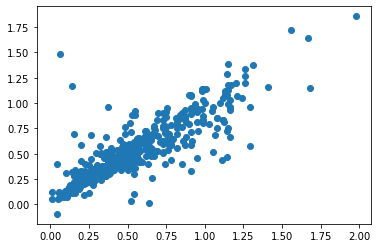

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y_real.numpy(),y_pred.numpy())

# More simple models

In [323]:
#train_df.iloc[:,:-1]

Algorithm RF, Train_error 0.002343863416025343, Test_error 0.015287146195384878
Algorithm ADB, Train_error 0.022402836206209285, Test_error 0.026940854279657384
Algorithm GBR, Train_error 0.0067668944488893865, Test_error 0.016249261287813944
Algorithm ETR, Train_error 1.365483638412439e-30, Test_error 0.014738808021953346


0.8038830661461989


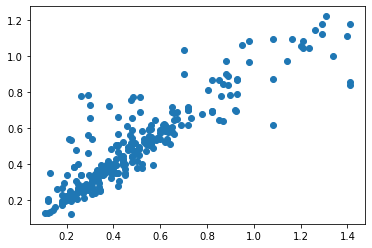

In [15]:
test_df['Vmic_pred'] = model.predict(test_x)
test_df.to_csv(os.path.join(source_path,'test_pred.csv'))

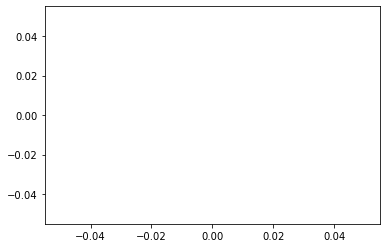

In [28]:
import matplotlib.pyplot as plt
import numpy as np

hl, = plt.plot([], [])
def update_line(hl, new_data):
    hl.set_xdata(np.append(hl.get_xdata(), new_data))
    hl.set_ydata(np.append(hl.get_ydata(), new_data))
    plt.draw()

# Leave-One-Out modeling for Vmic

In [87]:
import pandas as pd 
import os
source_path = '/Users/kai/Documents/Desktop/CO2_adsorption/new_data'
file_name = 'Ethane&Ethylene'
temp_data = pd.read_csv(os.path.join(source_path,file_name+'-fitting-01-10-2022.csv'))

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

test_mse = []
temp_data = temp_data.dropna(axis=0,how = 'any',subset = ["BET","Vt",'Vmic'])
for i in list(set(temp_data['Index'].values)):
    
    if i not in ex_list:
    
        test_data = temp_data[temp_data['Index']==i]
        train_data = temp_data[temp_data['Index']!=i]
        
        input_feature = ['E','V','L','BET','Vt','Vmic','Temp(K)','Pressure']
        output = ['Adsorp(mmol/g)']
        train_x = train_data[input_feature]
        train_y = train_data[output].values.reshape(-1)
        test_x = test_data[input_feature]
        test_y = test_data[output].values.reshape(-1)
        model = RandomForestRegressor(n_estimators=200,n_jobs=-1)
        model.fit(train_x,train_y)
        test_mse.append([i,r2_score(test_y,model.predict(test_x)),mean_squared_error(test_y,model.predict(test_x))])
        if len(test_mse)%20==0:
            print(test_mse[-1])

[88, nan, 0.12428359902642427]
[111, nan, 0.005602094289660763]
[131, nan, 0.0007626136063834368]
[154, nan, 0.017448781572767514]
[175, nan, 0.010046996376417254]
[196, nan, 2.9050054371961175e-05]
[241, nan, 0.08143344934747204]
[272, nan, 0.31163465489892045]
[293, nan, 0.008629246022953133]
[330, nan, 0.19876432044831835]
[369, nan, 0.00794969597225505]
[390, nan, 0.22214902997392633]
[418, nan, 0.002925542196592018]


In [95]:
pd.DataFrame(test_mse,columns=['group','r2','mse']).to_csv(os.path.join(source_path,'Ethane&Ethylene_Vmic_LOO_0110_ex_ex.csv'))

In [93]:
# CO2 ex_list  = [173,485,489,685,814,815,867,1506,1600,1663,1855,1994,2126,431,823,824,1915] 
# Methane ex_list  = [102,144,145,150,173,188 ,228,264,346,375,398,457,458,487,555,606,614,774,785] 
# Hydrogen ex_list  = [0,1,2,9,10,11,12,47,58,68,74,80,87,89,100,190,250,263,283,297,299,300,310,344,370,376,407,442,445,453,476] 
ex_list = [51,74,90,99,105,170,270,240,179,134,274,302,361,382]